# Tutorial 14

Stars are a result of complex hydrodynamic, thermodynamic, chemical and nuclear processes happening inside them. For long astrophysicists have desired more and more accurate mathematical models in order to explain structure as well as processes going on inside stars. Most of these models are very complex, both in theory and in solving them numerically. Refer here to know more. But there have been instructive yet simplistic models proposed which can be used to get a good overview about the physics of these celestial objects.

One such model is the polytropic model.

The polytropic model can be obtained by combining hydrostatic equilibrium with the equation of conservation of mass and then assuming an equation of state.

The final equation, also known as the Lane-Emden equation, is given by:

$$
\frac{1}{\xi^2} \, \frac{d}{d\xi} \left( \xi^2 \frac{d\theta}{d\xi} \right) = -\theta^n
$$
Here $\xi$ is called the scaled radius and $\theta$ the polytropic temperature. The solution of the equation for each value of n is called a polytrope. The following relations are obeyed for this model:

- $P = K\rho^{1 + \frac{1}{n}}$. P and $\rho$, being the pressure and density at each point respectively, n is called the polytropic index and $K$ is the polytropic constant.
- $\rho = \rho_c \theta^n$. Here, $\rho_c$ is the density at the centre of the star.
- $P = P_c \theta^{n+1}$. Here, $P_c$ is the pressure at the centre of the star. (You would have to use this to obtain the initial conditions).
- $r=\alpha \xi$. $r$ is the radial coordinate within the star and $\alpha$ is called the length constant, given by

$$
\alpha^2 = \frac{K (n+1) \, \rho_c^{\,1 - \tfrac{1}{n}}}{4 \pi G}
$$

Your task is to numerically solve the Lane-Emden equation for n = 0,1,2,3,4,5 (Hint: You need to perform a task repeatedly. What do we do when we need to perform similar tasks repeatedly?) and make the plots of $\theta$ vs $\xi$ in each case. Before deciding to jump aboard, you should answer the following questions:

- What are the dependent and the independent variables you need to consider?
- $\textbf{Solution:}$ Dependent variable is $\theta$ and independent variable is $\xi$.

- What are the model parameters?
- $\textbf{Solution:}$ n is the model parameter.

- How many initial conditions will you need?
- $\textbf{Solution:}$ One initial condition since only one variable is involved.

- What are the initial conditions? Note that you can't supply arbitrary initial conditions, since the fundamental scientific constraint you have is that the star you have created must be physical !!! (Hint: What happens at the centre of a star?)
- $\textbf{Solution:}$ At $\xi = 0$ (centre of the star), $\theta = 1$.

Note that since you don't know the radius of the star beforehand, assume a reasonable span of $\xi$ on which you would want to integrate the model. You could try different such spans and then evaluate in each case. Also, since $\xi$ appears in the denominator of the model, you might get ZeroDivisionError while solving, so instead of starting from $\xi = 0$, choose a small value of close to 0 to start with.

After you have done this much, try to answer the following question:

Suppose you are given the pressure and density values at the center and the polytropic index of a star obeying the polytropic equation, how would you calculate its radius?

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

In [2]:
def lane_emden(xi, state, n):
    # xi is the independent variable, state (theta, y) is the dependent variable.
    theta = state[0]
    y = state[1]
    return [y, -(2*y)/xi - theta**n] 

In [3]:
n = np.arange(0, 6, 1)
xi_span = (1e-2, 10) # xi_0 and xi_f
xi = np.linspace(1e-2, 5, 1000) # Evaluation xi points
init_state = [1 - ((1e-2)**2)/6, -(1e-2)/3] # Initial state of the system

In [4]:
solutions = []
for n_i in n:
    init_state = [1 - (1e-2)**2/6, -(1e-2)/3]  # series expansion at small xi
    sol = solve_ivp(
        lane_emden,
        xi_span,
        init_state,
        t_eval=xi,
        args=(n_i,)
    )
    solutions.append(sol)

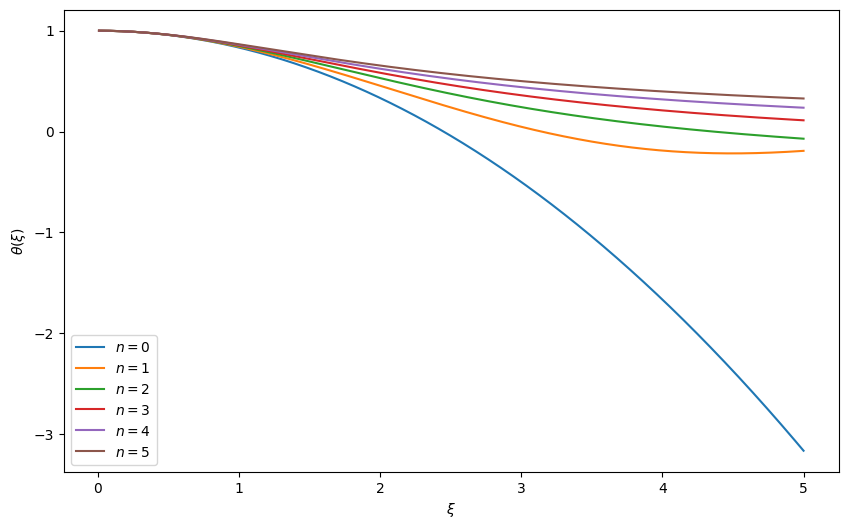

In [5]:
plt.figure(figsize=(10, 6))

for n_i, sol in zip(n, solutions):
    xi_vals = sol.t # sol.t gives the xi values at which the ODE is evaluated
    theta_vals = sol.y[0] # sol.y gives theta(xi) values from sol
    plt.plot(xi_vals, theta_vals, label=fr"$n={n_i}$")

plt.xlabel(r"$\xi$")
plt.ylabel(r"$\theta(\xi)$")
plt.legend()
plt.show()